<div style="text-align: right;"><h4>ФБ-24 Цадзікідзе Арсен</h4></div>
<h1><center>Лабораторна робота №6</center></h1>
<h3><center>З предмета "Засоби підготовки та аналізу даних"</center></h3>

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete") # Setting up the coding environment

Setup Complete


<p><h4> 1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів </h4></p>

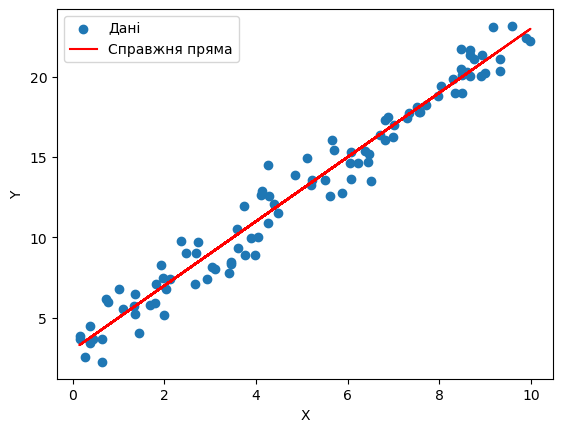

In [2]:
k = 2
b = 3

# Генеруємо випадкові дані з нормальним розподілом навколо прямої
n_points = 100
x = np.random.rand(n_points) * 10
y = k * x + b + np.random.randn(n_points)

plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', label='Справжня пряма')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<p><h4>2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^</h4></p>

In [3]:
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x ** 2)

    k_hat = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
    b_hat = y_mean - k_hat * x_mean

    return k_hat, b_hat

k_hat, b_hat = least_squares(x, y)
print("Оцінка k^:", k_hat)
print("Оцінка b^:", b_hat)

Оцінка k^: 1.9956373871069426
Оцінка b^: 2.9527518892112194


<p><h4> 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є) </h4></p>

In [4]:
# Оцінка параметрів прямої за допомогою np.polyfit
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print("Оцінки параметрів за методом найменших квадратів:")
print(f"k^ = {k_hat}, b^ = {b_hat}")

print("\nОцінки параметрів за допомогою np.polyfit:")
print(f"k = {k_polyfit}, b = {b_polyfit}")

print("\nПочаткові параметри прямої:")
print(f"k = {k}, b = {b}")

Оцінки параметрів за методом найменших квадратів:
k^ = 1.9956373871069426, b^ = 2.9527518892112194

Оцінки параметрів за допомогою np.polyfit:
k = 1.9956373871069462, b = 2.952751889211206

Початкові параметри прямої:
k = 2, b = 3


<p><h4> 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її </h4></p>

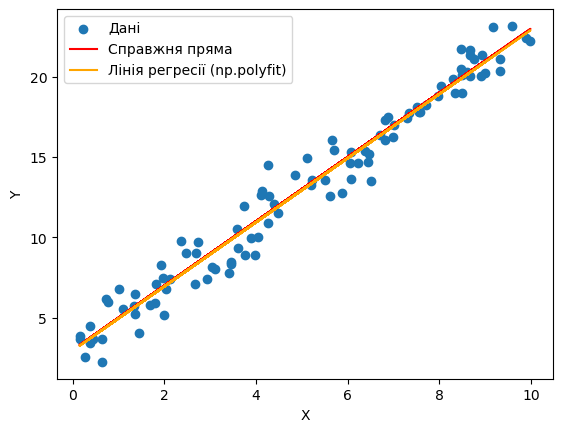

In [5]:
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Справжня пряма')
plt.plot(x, k_polyfit*x + b_polyfit, color='orange', label='Лінія регресії (np.polyfit)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<p><h4> 1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter </h4></p>

In [6]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0
    
    for i in range(n_iter):
        y_pred = k * x + b  # Передбачені значення
        
        # Обчислення часткових похідних
        dk = np.sum(2 * (y_pred - y) * x) / x.size
        db = np.sum(2 * (y_pred - y)) / x.size
        
        # Оновлення значень k та b
        k -= learning_rate * dk
        b -= learning_rate * db
        
    return k, b

learning_rate = 0.01
n_iter = 1000
k_gd, b_gd = gradient_descent(x, y, learning_rate, n_iter)
print(f"Оцінки параметрів за методом градієнтного спуску: k = {k_gd}, b = {b_gd}")

Оцінки параметрів за методом градієнтного спуску: k = 1.9984053101668684, b = 2.934536712925969


<p><h4> 2. Додайте отриману лінію регресії на загальний графік </h4></p>

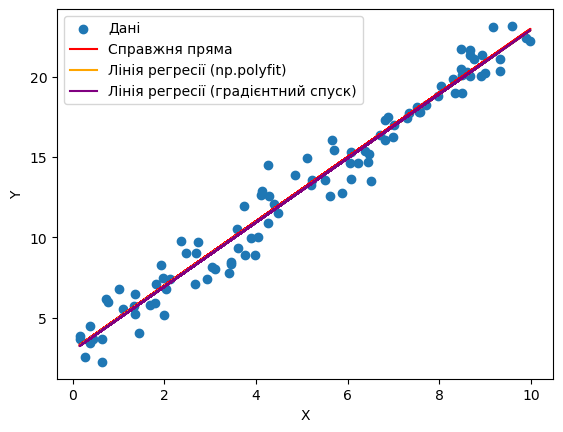

In [7]:
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Справжня пряма')
plt.plot(x, k_polyfit*x + b_polyfit, color='orange', label='Лінія регресії (np.polyfit)')
plt.plot(x, k_gd*x + b_gd, color='purple', label='Лінія регресії (градієнтний спуск)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<p><h4> 3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки </h4></p>

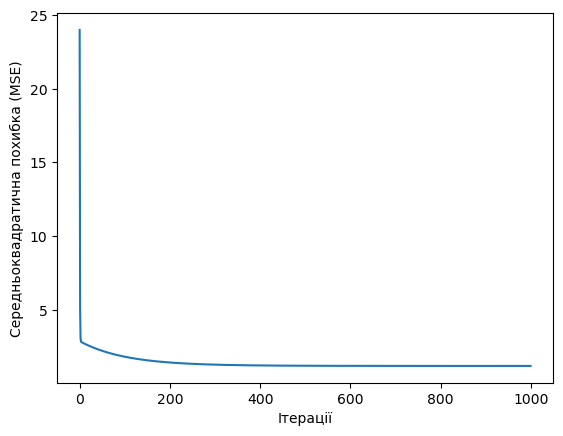

In [8]:
# Функція для обчислення суми квадратів похибок
def compute_mse(k, b, x, y):
    y_pred = k * x + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

# Збереження історії похибок
mse_history = []
for i in range(n_iter):
    k_gd, b_gd = gradient_descent(x, y, learning_rate, i+1)
    mse = compute_mse(k_gd, b_gd, x, y)
    mse_history.append(mse)

plt.plot(range(n_iter), mse_history)
plt.xlabel('Ітерації')
plt.ylabel('Середньоквадратична похибка (MSE)')
plt.show()

<p><h4> 4. Порівняйте отримані результати з результатами попереднього завдання </h4></p>

In [9]:
print("\nПорівняння оцінок параметрів:")
print(f"Найменші квадрати: k = {k_hat}, b = {b_hat}")
print(f"Градієнтний спуск: k = {k_gd}, b = {b_gd}")
print(f"np.polyfit: k = {k_polyfit}, b = {b_polyfit}")


Порівняння оцінок параметрів:
Найменші квадрати: k = 1.9956373871069426, b = 2.9527518892112194
Градієнтний спуск: k = 1.9984053101668684, b = 2.934536712925969
np.polyfit: k = 1.9956373871069462, b = 2.952751889211206
